<a href="https://colab.research.google.com/github/madhumithawaran/machine-learning/blob/main/ml_ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
df=pd.read_csv("blood.csv")

In [ ]:
df.head()

,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      748 non-null    int64
 1   V2      748 non-null    int64
 2   V3      748 non-null    int64
 3   V4      748 non-null    int64
 4   Class   748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
x=df.drop('Class',axis=1)
y=df['Class']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

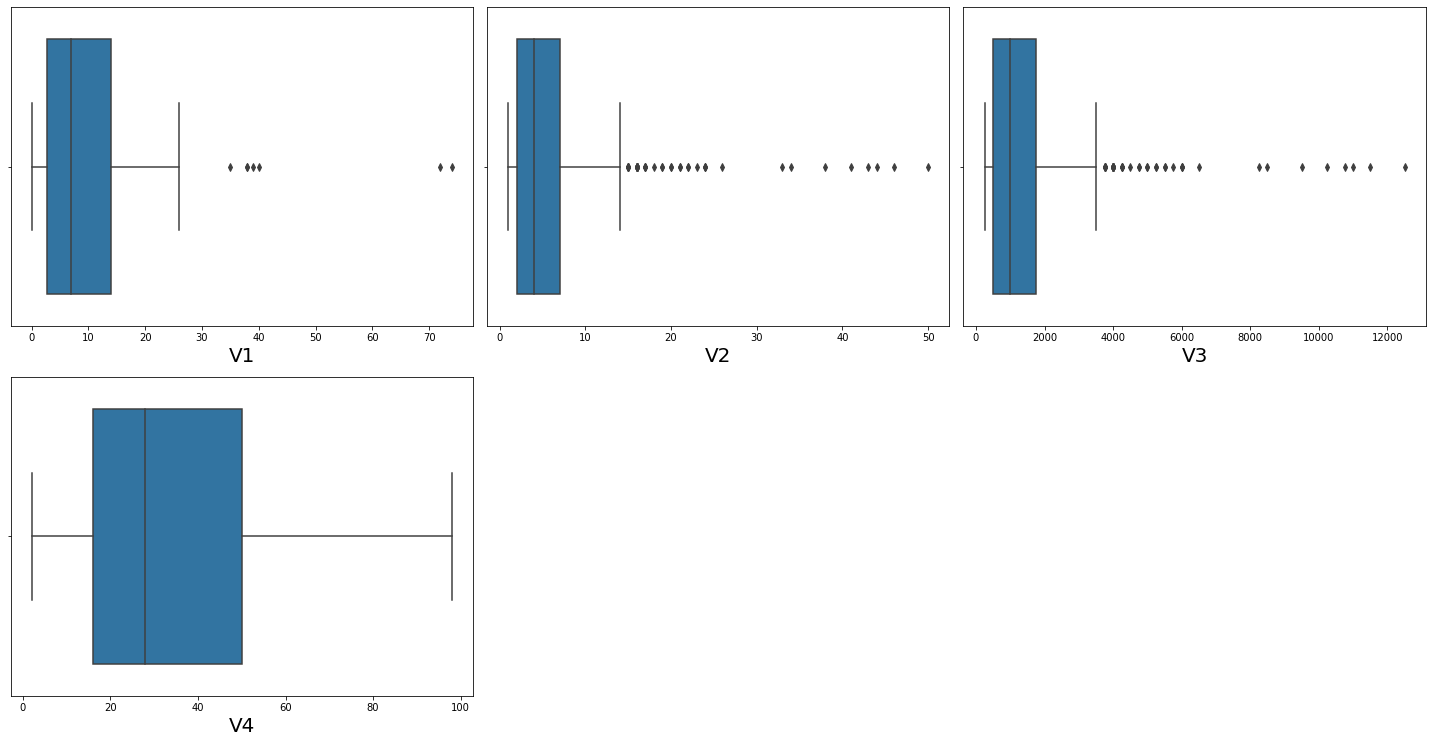

In [ ]:
plt.figure(figsize=(20,15))
plotnumber=1
for col in x.columns:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

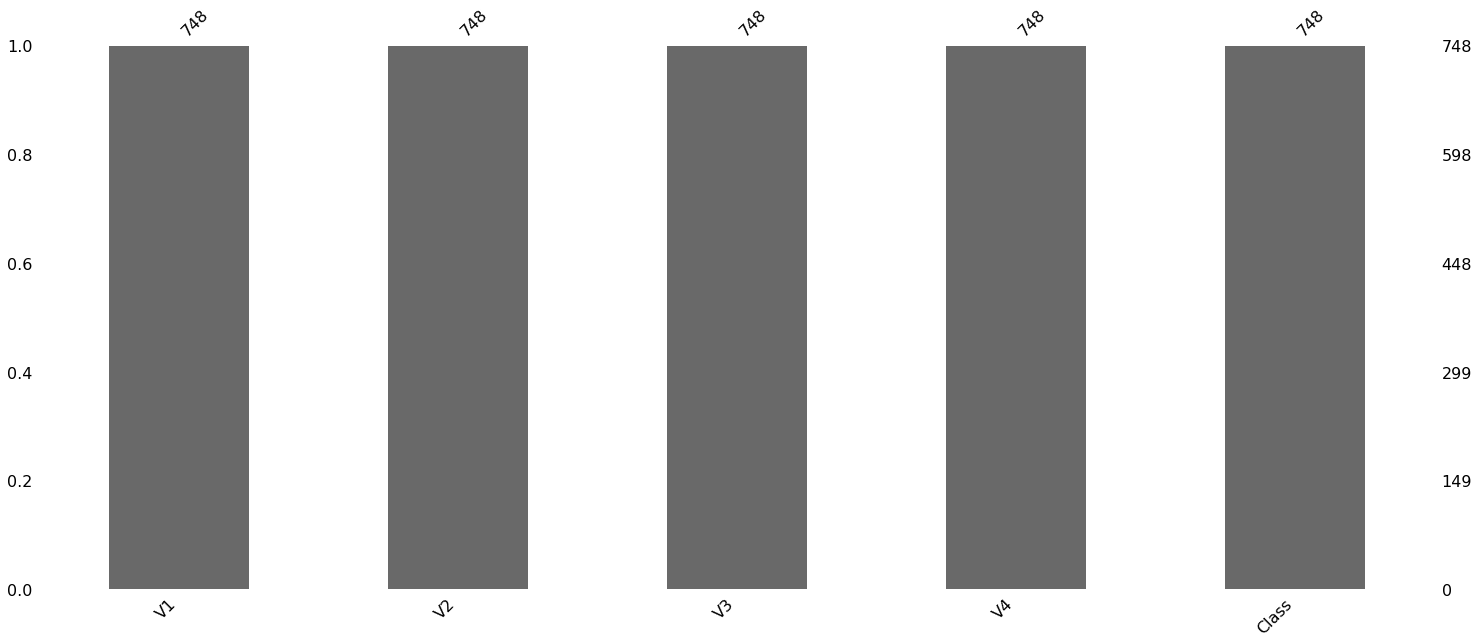

In [ ]:
import missingno as msno
msno.bar(df)
plt.show()

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=0)

In [ ]:
a= StandardScaler()
x_train = a.fit_transform(x_train)
x_test = a.fit_transform(x_test)

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[227,  58],
       [ 56,  33]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6951871657754011

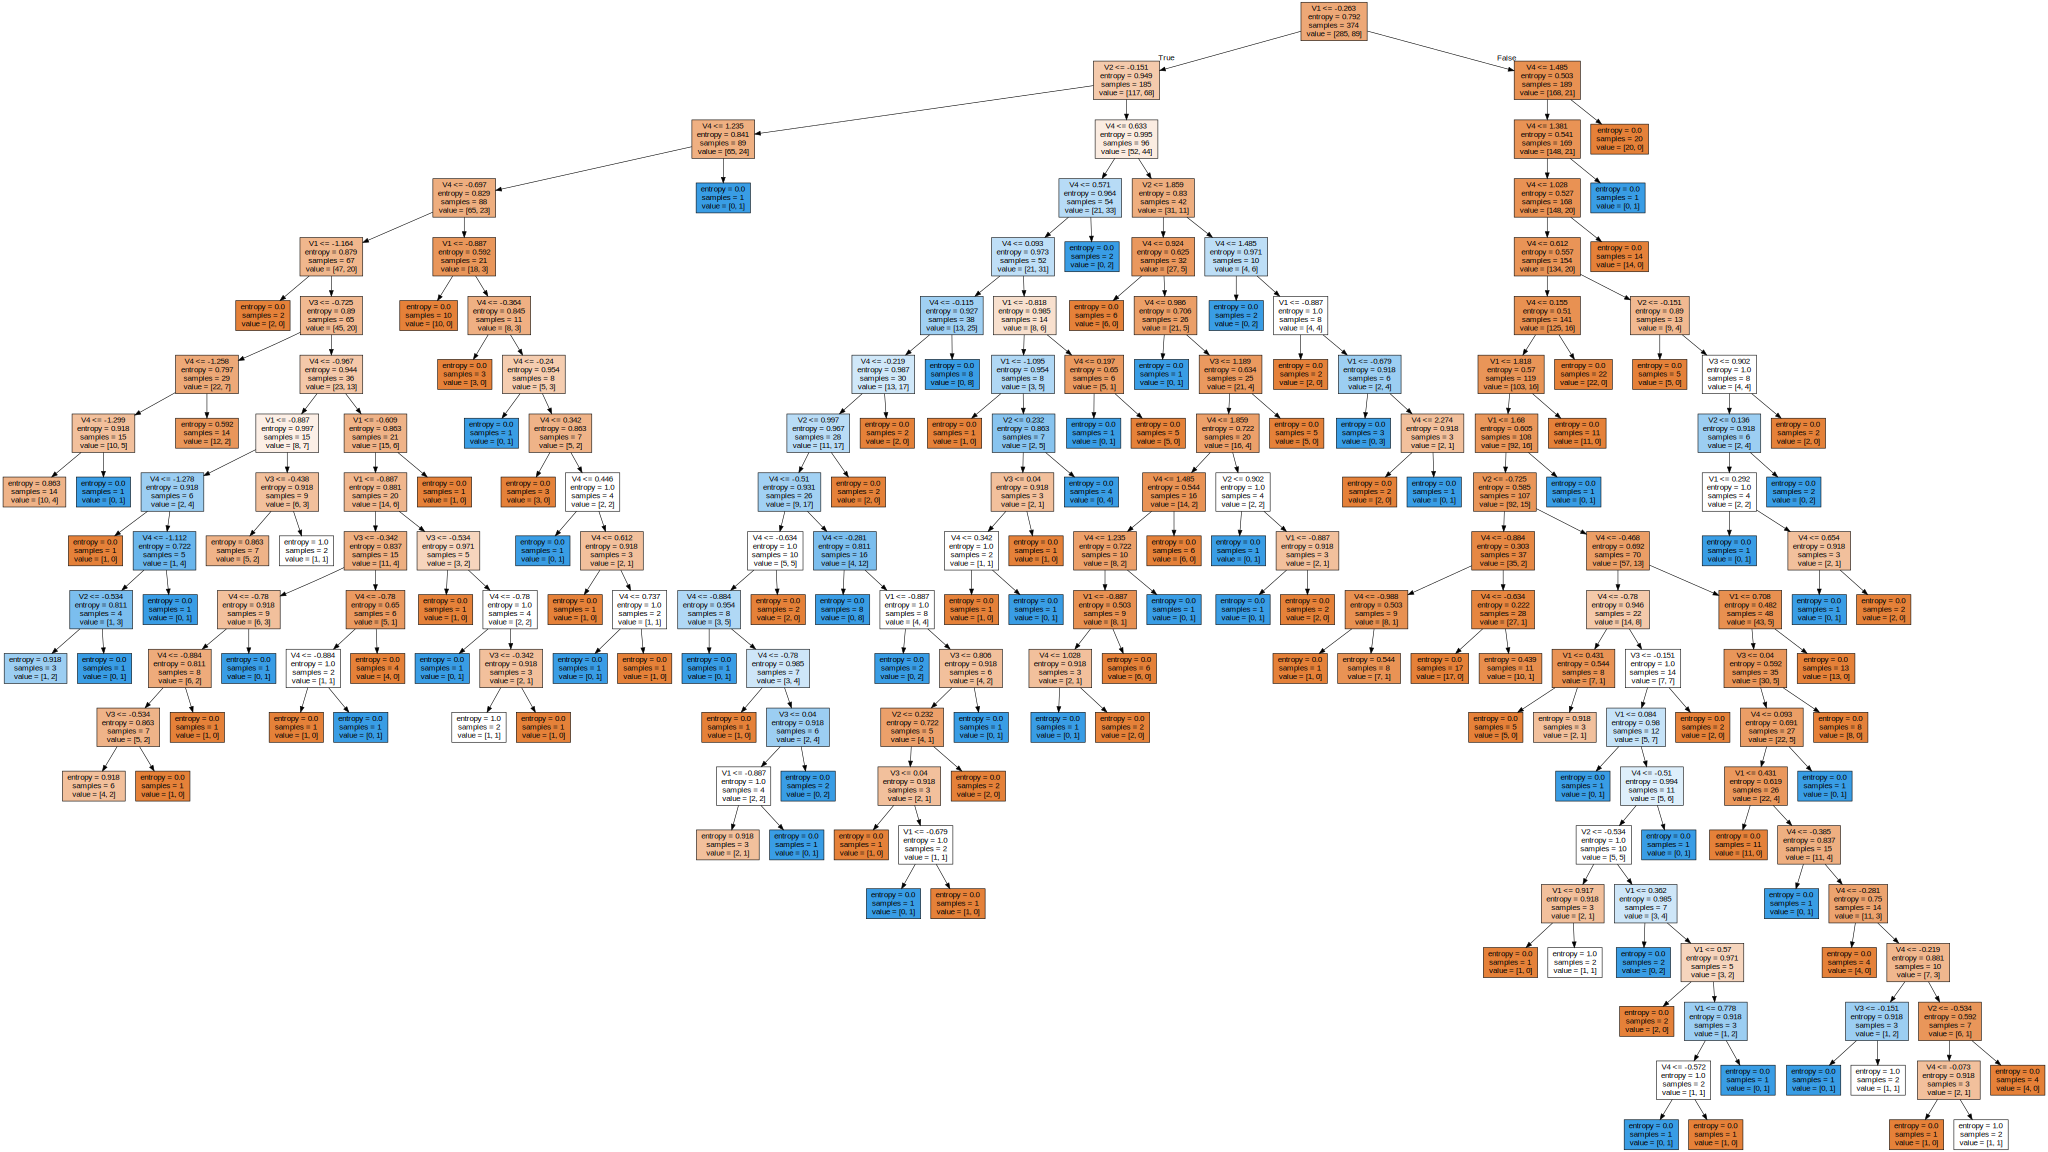

In [ ]:
graphviz.Source(export_graphviz(clf,feature_names=x.columns,filled=True))

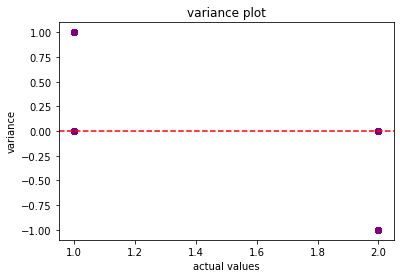

In [ ]:
variance=y_pred - y_test
fig,ax=plt.subplots()
ax.scatter(y_test,variance,color='purple',alpha=0.5)
ax.axhline(y=0, color='red',linestyle='--')
ax.set_xlabel("actual values")
ax.set_ylabel("variance")
ax.set_title("variance plot")
plt.show()



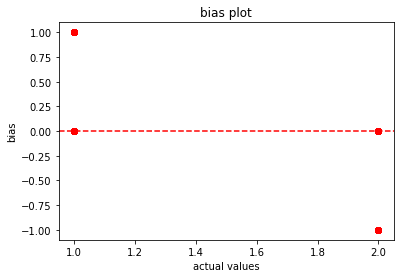

In [ ]:
bias=y_pred - y_test
fig,ax=plt.subplots()
ax.scatter(y_test,bias,color='red',alpha=0.5)
ax.axhline(y=0, color='red',linestyle='--')
ax.set_xlabel("actual values")
ax.set_ylabel("bias")
ax.set_title("bias plot")
plt.show()
